In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
reviews = pd.read_csv("yelp_academic_dataset_review.csv")
businesses = pd.read_csv("yelp_academic_dataset_business.csv")

reviews = reviews.merge(businesses, how='left', on='business_id')
reviews = reviews[(reviews['city'] == 'Philadelphia') & (reviews['categories'].str.contains('Restaurants', na=False))]
reviews.reset_index(drop=True, inplace=True)
# reviews = reviews[['review_id', 'user_id', 'business_id', 'stars_x', 'text']]

reviews.head() 

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
1,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,PA,19147,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."
2,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,LaScala's,...,PA,19106,39.949529,-75.152139,3.5,367,0,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Pizza, Restaurants, Italian, Salad","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
3,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,Rittenhouse Grill,...,PA,19103,39.948949,-75.169532,3.5,290,1,"{'RestaurantsAttire': ""u'dressy'"", 'Restaurant...","Wine Bars, Restaurants, Nightlife, Steakhouses...","{'Wednesday': '16:30-22:0', 'Thursday': '16:30..."
4,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,Good Karma Cafe,...,PA,19107,39.944609,-75.157833,4.0,249,1,"{'Alcohol': ""u'none'"", 'RestaurantsReservation...","Food, Cafes, Coffee & Tea, Restaurants","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."


In [4]:
reviews['date'] = pd.to_datetime(reviews['date']).dt.date
ts = reviews.groupby('date').size().reset_index(name='count')

# Display the result
print(ts)

            date  count
0     2005-02-16      1
1     2005-05-25      1
2     2005-05-26      4
3     2005-06-22      1
4     2005-06-24      5
...          ...    ...
5767  2022-01-15    107
5768  2022-01-16    138
5769  2022-01-17    132
5770  2022-01-18    103
5771  2022-01-19     75

[5772 rows x 2 columns]


C:\Users\bmfs9\AppData\Local\Temp\ipykernel_12272\3443486639.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = ts.resample('M', on='date').sum().reset_index()


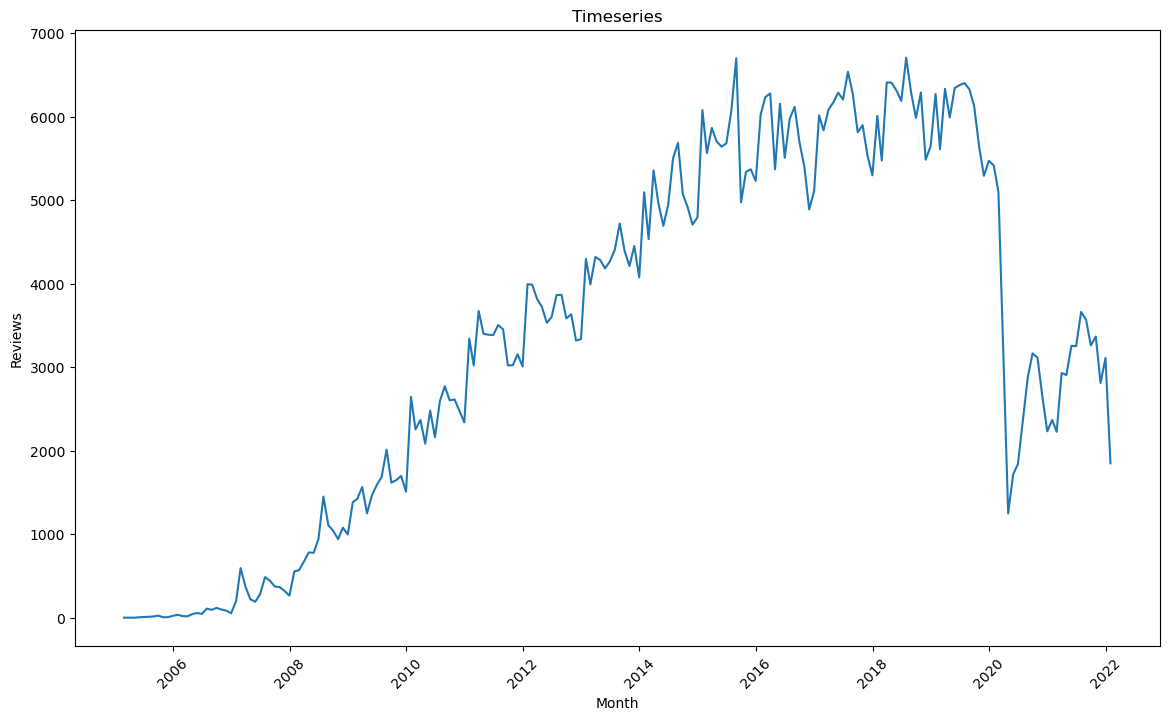

In [6]:
#prepare data and group by month
monthly_reviews = ts.resample('M', on='date').sum().reset_index()

#plot
plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['date'], monthly_reviews['count'])  
plt.xlabel('Month')
plt.ylabel('Reviews')
plt.title('Timeseries')
plt.xticks(rotation=45)
plt.show()

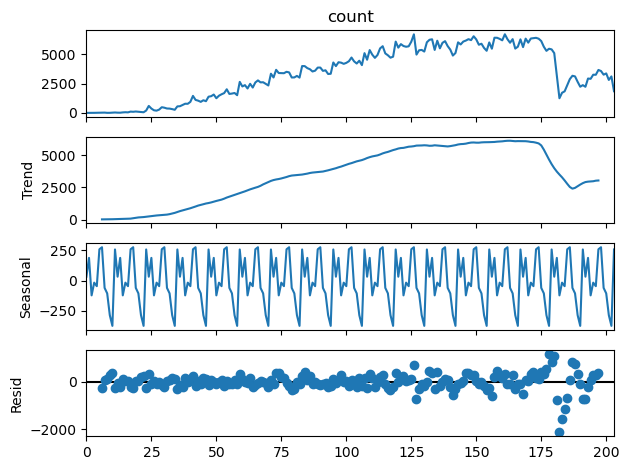

In [13]:
result = seasonal_decompose(monthly_reviews['count'], model='additive', period=12)
result.plot();

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


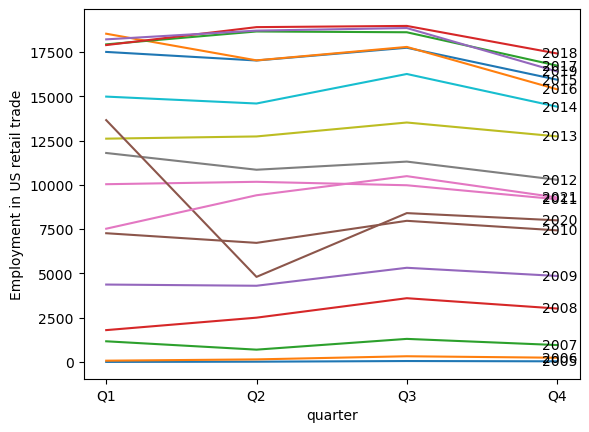

In [15]:
# create new dummy variables with the calendar dates
ts['quarter'] = ts['date'].dt.quarter
ts['year'] = ts['date'].dt.year

df_grouped = ts.groupby(['quarter', 'year'])['count'].sum().unstack()
df_grouped.plot()

# change the axis label accordingly
plt.xticks(range(1,5), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Employment in US retail trade')

# remove the legend and add the year to the line
plt.legend().remove()
for year in ts['year'].unique():
    plt.text(3.9, df_grouped.loc[4, year], year, va='center')

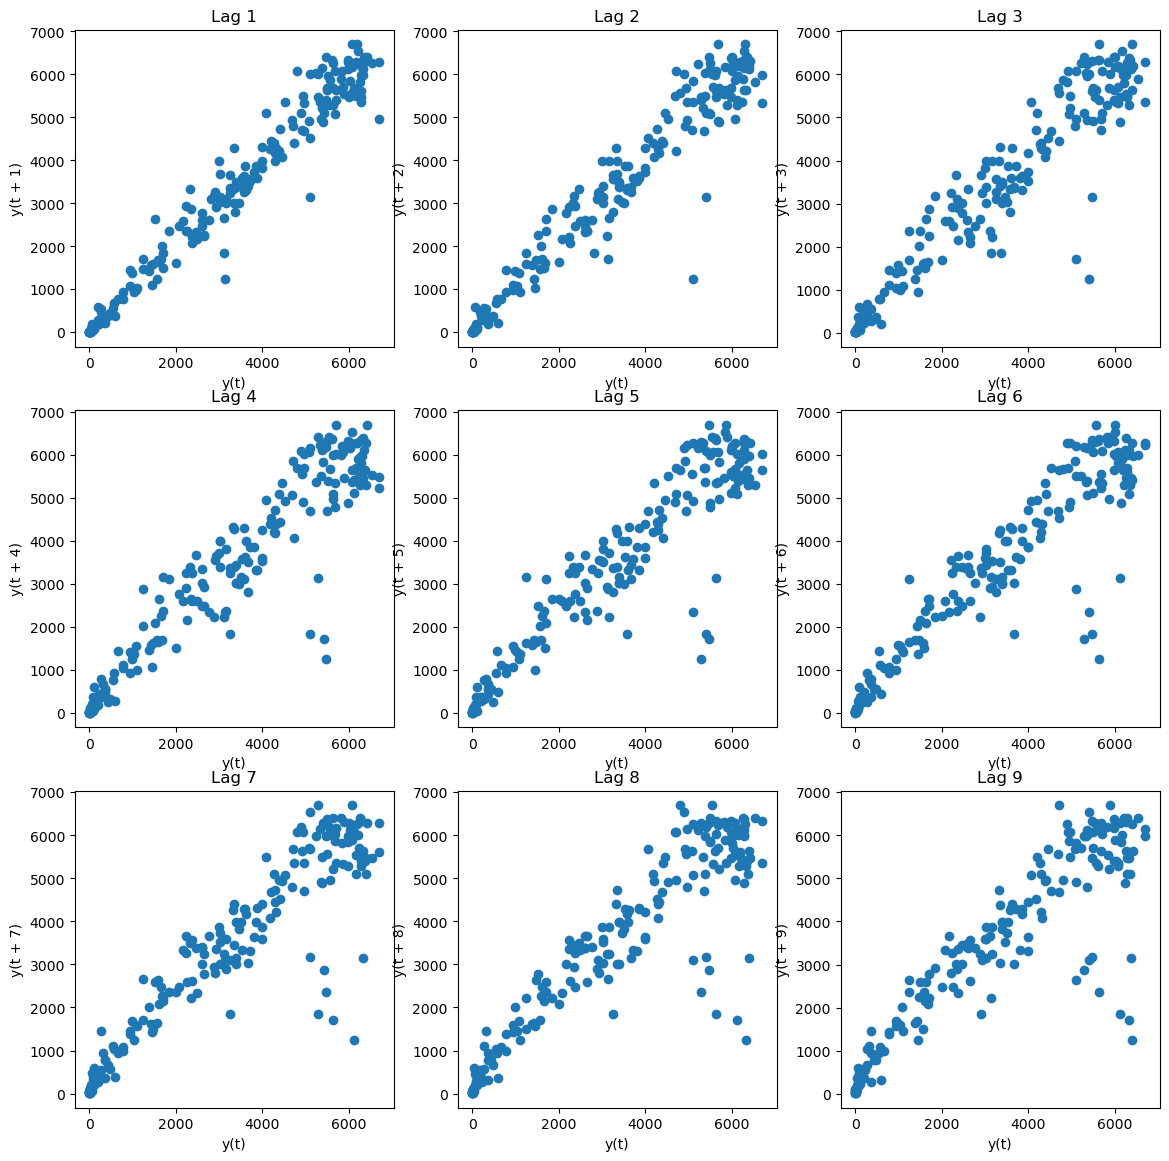

In [16]:
# NEED TO STUDY ; DO NOT KNOW HOW TO INTERPRET LAGGED PLOTS

_, axes = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axes.flatten()):
    pd.plotting.lag_plot(monthly_reviews['count'], lag=i+1, ax=ax)
    ax.set_title(f"Lag {i+1}")

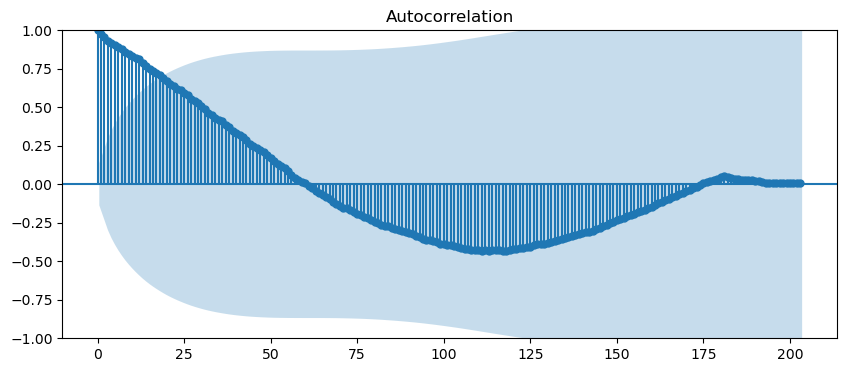

In [40]:
# ACF (autocorrelation )
_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_acf(monthly_reviews['count'].tolist(), lags=203, ax=ax);

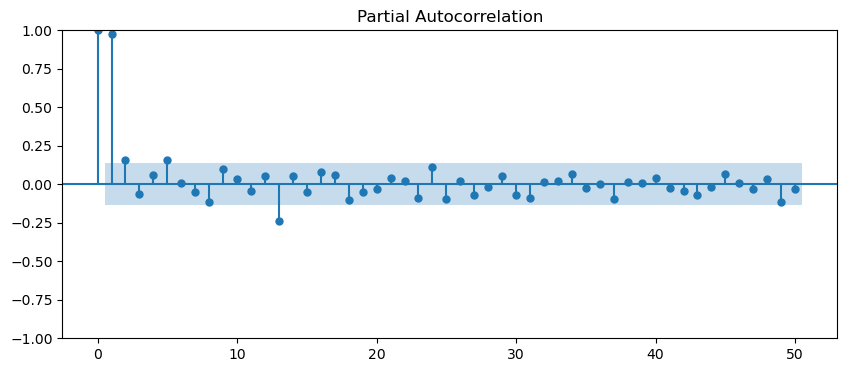

In [25]:
#Partial autocorrelation
_, ax = plt.subplots(figsize=(10,4), dpi= 100)
plot_pacf(monthly_reviews['count'].tolist(), lags=50, ax=ax);

In [27]:
# Augmented Dickey Fuller Test (ADF test)
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(monthly_reviews['count'], autolag="AIC")

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

#p-value of 0.47 means that the timeseries is not stationary

ADF Statistic: -1.6191187127475772
p-value: 0.4731913533390899
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


In [28]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(monthly_reviews['count'], regression="c", nlags="auto")

print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print(f'Critical Values: {kpss_result[3]}');

# On this test the hypothesis are opposite, so p<0.05 means that timeserie is not stationary

KPSS Statistic: 1.4843960125357374
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\bmfs9\AppData\Local\Temp\ipykernel_12272\1675936474.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(monthly_reviews['count'], regression="c", nlags="auto")
